## Bitcoin High's/Low's Prediction
### Software For Financial Industry

Predicting Price by building optimized model using machine learning and deep neural networks.
For building a financial industrial software, I will be predicting the Bitcoin price where we have more than 9000+ rows and 12 columns for making data-driven models.
According to the source this dataset is from CoinMarketCap Data From August 4 to November 4, 2017. Before proceeding further I will be better first pre-processing the data and preparing it for further models fittings. Got dataset for bitcoin from this source: https://www.kaggle.com/datasets/paulrohan2020/crypto-data

In this noteboook I have carried out different algorithms:
- Linear Regression
- Decision Tree Regressor
- Support Vector Regressor
- Ensemble Learning - Votting
- Bagging using DTR
- Deep Neural Network - Keras

Trained the models, evaluated through mean absolute errors and tuned the hyper parameters for the better predictions.

In [1]:
# importing all the necessary libraries for me 
# to carry out different operations of building models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MinMaxScaler, Normalizer, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline # For setting up pipeline

from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn import decomposition

from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing crypto-bitcoin data from the file.
raw_data = pd.read_csv("./btc-crypto.csv") # reading training file
raw_data

,Unnamed: 0,symbol,ranking by market cap,name,market cap,price,circulating supply,volume,% 1h,% 24h,% 1wk,file_name
0,362,BTC,1,Bitcoin,"$70,846,063,125",$4291.75,"16,507,500","$2,814,510,000",-2.16%,5.57%,24.99%,r_20170815-071005
1,1417,BTC,1,Bitcoin,"$76,715,293,809",$4639.63,"16,534,787","$1,731,360,000",0.56%,2.73%,10.53%,r_20170831-114005
2,2498,BTC,1,Bitcoin,"$71,411,773,702",$4316.74,"16,542,987","$2,080,400,000",-2.51%,-6.91%,0.54%,r_20170904-085005
3,3568,BTC,1,Bitcoin,"$67,158,717,638",$4066.51,"16,515,075","$2,796,620,000",-0.71%,-5.92%,9.26%,r_20170819-065505
4,4615,BTC,1,Bitcoin,"$67,243,714,005",$4071.86,"16,514,250","$2,611,450,000",-1.38%,-5.83%,13.93%,r_20170818-210005
...,...,...,...,...,...,...,...,...,...,...,...,...
9426,9926615,BTC,1,Bitcoin,"$71,308,175,058",$4310.37,"16,543,400","$2,486,960,000",0.46%,-4.42%,-0.17%,r_20170904-132006
9427,9927680,BTC,1,Bitcoin,"$70,475,225,454",$4268.07,"16,512,200","$2,400,960,000",-0.66%,-0.76%,25.34%,r_20170817-190505
9428,9928740,BTC,1,Bitcoin,"$72,348,215,185",$4376.67,"16,530,425","$1,782,770,000",-0.25%,2.78%,13.37%,r_20170829-064005
9429,9929806,BTC,1,Bitcoin,"$68,520,412,389",$4147.00,"16,522,887","$2,279,970,000",0.16%,0.95%,-4.62%,r_20170824-044005


In [3]:
raw_data.dtypes # checking datatypes of the game dataframe

Unnamed: 0                int64
symbol                   object
ranking by market cap     int64
name                     object
market cap               object
price                    object
circulating supply       object
volume                   object
% 1h                     object
% 24h                    object
% 1wk                    object
file_name                object
dtype: object

In [4]:
raw_data.duplicated(keep='last') # We have no any duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
9426    False
9427    False
9428    False
9429    False
9430    False
Length: 9431, dtype: bool

In [5]:
raw_data.isna().sum() # Checking if there's IsNA or any empty value and printing the count of them

Unnamed: 0               0
symbol                   0
ranking by market cap    0
name                     0
market cap               0
price                    0
circulating supply       0
volume                   0
% 1h                     0
% 24h                    0
% 1wk                    0
file_name                0
dtype: int64

In [6]:
print(raw_data.columns.tolist())

['Unnamed: 0', 'symbol', 'ranking by market cap', 'name', 'market cap', 'price', 'circulating supply', 'volume', '% 1h', '% 24h', '% 1wk', 'file_name']


## Preprocessing data

#### Column file_name has the dates for the data when it was collected which we split and merge with different string options.

In [7]:
raw_data["date"] = raw_data["file_name"].str.split("-", expand=True)[0].str.split("_", expand=True)[1] ## splitting by '-' and then by '_'
raw_data["date"] = raw_data['date'].str[:4] + '-' + raw_data['date'].str[4:] # merging hyphen after every 4 letters in date
raw_data["date"] = raw_data['date'].str[:7] + '-' + raw_data['date'].str[7:] # adding hyphen again but now after every 7 letter
raw_data = raw_data.drop('file_name', 1) ## dropping file_name and keeping only date column

#### Removing all the % signs from %1h, %24h and %1wk columns.

In [8]:
raw_data['% 1h'] =raw_data['% 1h'].str.replace('%', '') # replacing % with null
raw_data['% 24h'] =raw_data['% 24h'].str.replace('%', '')# replacing % with null
raw_data['% 1wk'] =raw_data['% 1wk'].str.replace('%', '')# replacing % with null

#### Now removing all the dollar '$' signs from market cap, price, and volume

In [9]:
# first market cap
raw_data['market cap'] =raw_data['market cap'].str.replace('$', '')
raw_data['market cap'] =raw_data['market cap'].str.replace(',', '')
# price
raw_data['price'] =raw_data['price'].str.replace('$', '')
# volume
raw_data['volume'] =raw_data['volume'].str.replace('$', '')
raw_data['volume'] =raw_data['volume'].str.replace(',', '')
# circulating supply
raw_data['circulating supply'] =raw_data['circulating supply'].str.replace(',', '')
# replacing '?' in the whole dataset
raw_data.replace('?', '0', inplace = True)

#### Droping symbol and name column which we now know that all the data is of Bitcoin and not needed for any further model making.

In [10]:
## dropping ranking by market cap, symbol, name and Unnamed: 0 columns
raw_data = raw_data.drop('ranking by market cap', 1) 
raw_data = raw_data.drop('name', 1) 
raw_data = raw_data.drop('Unnamed: 0', 1) 
raw_data = raw_data.drop('symbol', 1) 

#### Encoding date to futher year, month and day

In [11]:
raw_data[["year","month","day"]] = raw_data["date"].str.split("-", expand=True) ## splitting by '-'
raw_data = raw_data.drop('date', 1) ## dropping date column

#### Converting all the object columns to int64

In [12]:
int_object_cols = ["market cap", "circulating supply", "volume"]
for col in int_object_cols:
    raw_data[col] = raw_data[col].astype(int)


float_object_cols = ["price", "% 1h", "% 24h", "% 1wk"]
for col in float_object_cols:
    raw_data[col] = raw_data[col].astype(float)

int_object_cols = ["year","month","day"]
for col in int_object_cols:
    raw_data[col] = raw_data[col].astype(int)

In [13]:
raw_data

,market cap,price,circulating supply,volume,% 1h,% 24h,% 1wk,year,month,day
0,70846063125,4291.75,16507500,2814510000,-2.16,5.57,24.99,2017,8,15
1,76715293809,4639.63,16534787,1731360000,0.56,2.73,10.53,2017,8,31
2,71411773702,4316.74,16542987,2080400000,-2.51,-6.91,0.54,2017,9,4
3,67158717638,4066.51,16515075,2796620000,-0.71,-5.92,9.26,2017,8,19
4,67243714005,4071.86,16514250,2611450000,-1.38,-5.83,13.93,2017,8,18
...,...,...,...,...,...,...,...,...,...,...
9426,71308175058,4310.37,16543400,2486960000,0.46,-4.42,-0.17,2017,9,4
9427,70475225454,4268.07,16512200,2400960000,-0.66,-0.76,25.34,2017,8,17
9428,72348215185,4376.67,16530425,1782770000,-0.25,2.78,13.37,2017,8,29
9429,68520412389,4147.00,16522887,2279970000,0.16,0.95,-4.62,2017,8,24


#### Some graphical and numerical representations with correlation plot

array([[<AxesSubplot:title={'center':'market cap'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'circulating supply'}>],
       [<AxesSubplot:title={'center':'volume'}>,
        <AxesSubplot:title={'center':'% 1h'}>,
        <AxesSubplot:title={'center':'% 24h'}>],
       [<AxesSubplot:title={'center':'% 1wk'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'day'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

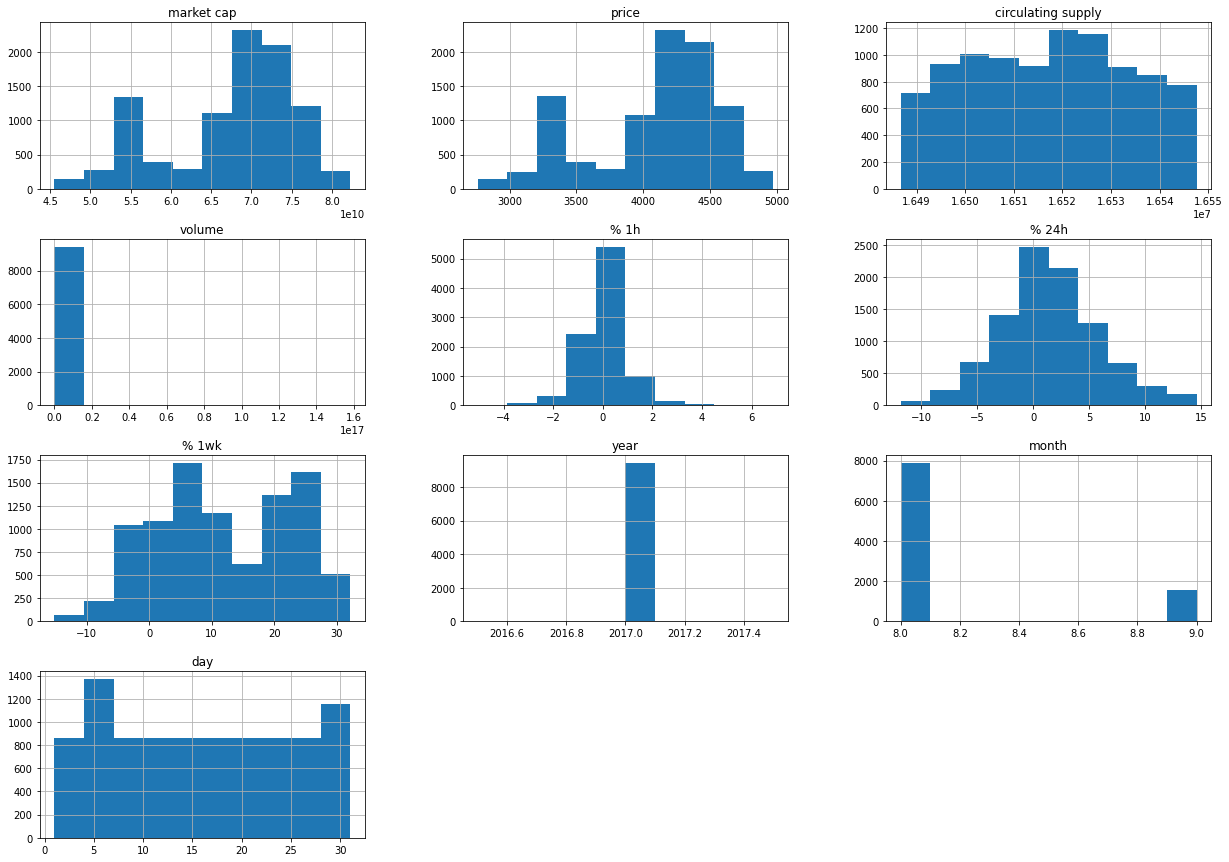

In [14]:
raw_data.hist(figsize=(21,15)) ### checking graphical representation/spread for our data through histogram

In [15]:
raw_data.describe().T ## checking the numerical spread of our data through statistical methods for all the columns

,count,mean,std,min,25%,50%,75%,max
market cap,9431.0,6.727159e+10,7.840992e+09,4.551441e+10,6.303599e+10,6.910735e+10,7.223193e+10,8.227914e+10
price,9431.0,4.072401e+03,4.714801e+02,2.760670e+03,3.818740e+03,4.183530e+03,4.370565e+03,4.975040e+03
circulating supply,9431.0,1.651727e+07,1.647548e+04,1.648672e+07,1.650300e+07,1.651811e+07,1.653034e+07,1.654759e+07
volume,9431.0,3.337736e+13,2.291732e+15,8.572620e+08,1.710580e+09,2.137150e+09,2.646530e+09,1.580480e+17
% 1h,9431.0,6.497826e-02,9.023392e-01,-5.050000e+00,-3.900000e-01,7.000000e-02,5.200000e-01,6.880000e+00
% 24h,9431.0,1.459332e+00,4.395197e+00,-1.185000e+01,-1.300000e+00,1.240000e+00,4.150000e+00,1.462000e+01
% 1wk,9431.0,1.177127e+01,1.077127e+01,-1.515000e+01,3.455000e+00,1.048000e+01,2.211000e+01,3.219000e+01
year,9431.0,2.017000e+03,0.000000e+00,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03
month,9431.0,8.164034e+00,3.703256e-01,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,9.000000e+00
day,9431.0,1.541374e+01,9.047850e+00,1.000000e+00,7.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01


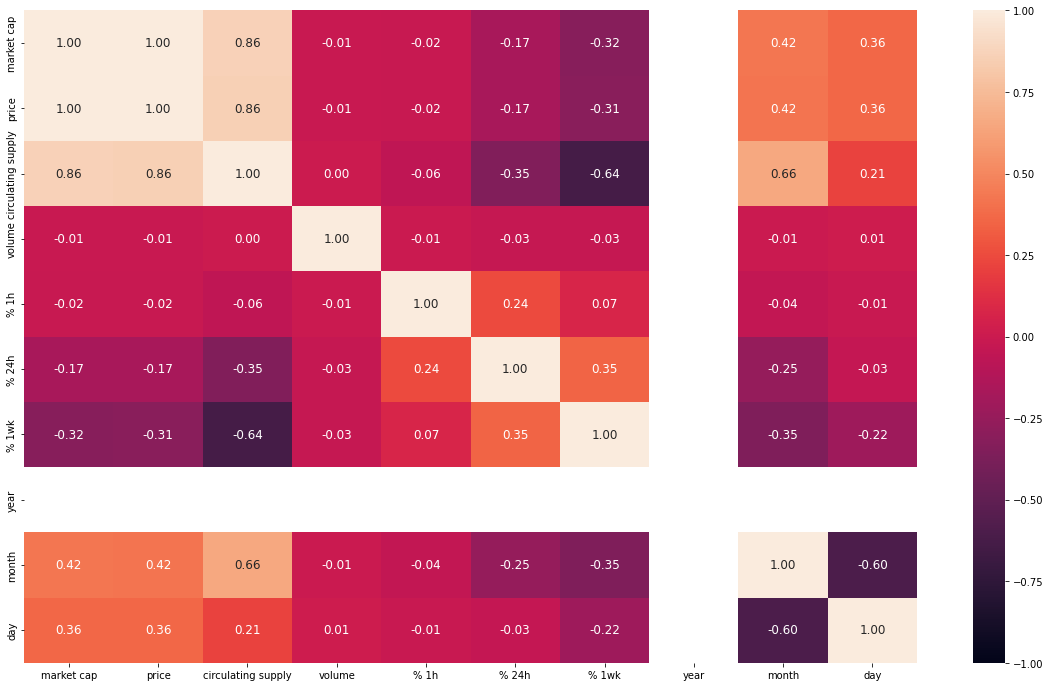

In [16]:
# checking correlation which can help us in decinding which column will help us better in predicting our price
plt.figure(figsize=(20,12))
sns.heatmap(raw_data.corr(), annot=True, annot_kws={"fontsize":12}, fmt=".2f", vmin=-1)
plt.show()

##### We have many columns which are not good for model building or are not showing good collinearity but still we are going to consider these all columns.

### Running Optimizations/ Making Models for predicing price

#### Normalizing data through SKlearn min-max normalization | y = (x – min) / (max – min) |

In [17]:
# Normalizing training dataframe
min_max_scaler = preprocessing.MinMaxScaler() # Choosing MinMax scaler for normalization between (0-1) 
btc_data_frame = min_max_scaler.fit_transform(raw_data) # Scalling the whole data
btc_data = pd.DataFrame(btc_data_frame)

In [18]:
btc_data

,0,1,2,3,4,5,6,7,8,9
0,0.689021,0.691429,0.341346,1.238388e-08,0.242246,0.658104,0.847909,0.0,0.0,0.466667
1,0.848664,0.848530,0.789688,5.530586e-09,0.470243,0.550812,0.542459,0.0,0.0,1.000000
2,0.704408,0.702715,0.924419,7.739029e-09,0.212909,0.186626,0.331432,0.0,1.0,0.100000
3,0.588725,0.589712,0.465808,1.227069e-08,0.363789,0.224027,0.515632,0.0,0.0,0.600000
4,0.591037,0.592128,0.452253,1.109908e-08,0.307628,0.227427,0.614280,0.0,0.0,0.566667
...,...,...,...,...,...,...,...,...,...,...
9426,0.701590,0.699838,0.931205,1.031141e-08,0.461861,0.280695,0.316434,0.0,1.0,0.100000
9427,0.678934,0.680735,0.418570,9.767273e-09,0.367980,0.418965,0.855302,0.0,0.0,0.533333
9428,0.729879,0.729779,0.718018,5.855867e-09,0.402347,0.552701,0.602450,0.0,0.0,0.933333
9429,0.625763,0.626061,0.594164,9.001746e-09,0.436714,0.483566,0.222433,0.0,0.0,0.766667


#### Deviding into training and testing datasets for preparing models

In [19]:
y = btc_data.iloc[:, 1]
btc_data = btc_data.drop(1, 1) ## dropping price column
X = btc_data

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## Decision Tree Regressor

In [20]:
# fitting our DecisionTree model with random setting
tree = DecisionTreeRegressor(random_state=1)
tree.fit(X_train, y_train)
ypredtest = tree.predict(X_test)

In [21]:
metrics.mean_absolute_error(y_test, ypredtest)

0.00039024412195120606

In [22]:
#GRIDsearchCV for better settings finding out
hyperparameters = {"max_depth":(5, 8, 15, 30, 35, 50), "max_features":(0.2, 0.4, 0.6, 0.8), "min_samples_split":(2, 5, 8, 10, 20)}
Grid= GridSearchCV(estimator=tree, param_grid=hyperparameters, cv=8, scoring="neg_mean_absolute_error", n_jobs=-1)
Grid.fit(X_train, y_train)

GridSearchCV(cv=8, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': (5, 8, 15, 30, 35, 50),
                         'max_features': (0.2, 0.4, 0.6, 0.8),
                         'min_samples_split': (2, 5, 8, 10, 20)},
             scoring='neg_mean_absolute_error')

In [23]:
Grid.best_estimator_

DecisionTreeRegressor(max_depth=30, max_features=0.8, random_state=1)

In [24]:
## fitting out decisiontree regressor with the best setting got through GRIDSEARCHCV and getting improved MSE.
tree = DecisionTreeRegressor(max_depth=30,max_features=0.8, min_samples_split= 2, random_state=1)
tree.fit(X_train, y_train)
ypredd = tree.predict(X_test)

In [25]:
metrics.mean_absolute_error(y_test, ypredd) # We have got some improvement in the end result overall with the best features.

0.0004938590084033653

In [26]:
# now carrying over cross validation for decision regressor
from sklearn.model_selection import cross_val_score
cvscore = cross_val_score(tree, X_train, y_train, cv=8)
cvscore

array([0.99996687, 0.9999794 , 0.99997012, 0.99997991, 0.99996217,
       0.99998238, 0.99997695, 0.9999702 ])

In [27]:
cvscore.mean()

0.9999735002982324

### Result:
Got improved means absolute loss through the hyperparamters turnning through GRID and then also get to know that cross validation has a greater accuracies over all in prediction.

## Linear Regression

In [64]:
# fitting this pipeline for running different algorithms froom smoothen data to training model
pipe = Pipeline([
('scaler', MinMaxScaler()),
('pca', decomposition.PCA()),
('LR', LinearRegression())
])
pipe.fit(X_train, y_train)
y_pred_lr = pipe.predict(X_test)

In [65]:
print('Linear Regression using Pipe')
print('Error Calculation: ', pipe.score(X_test,y_test))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred_lr))

Linear Regression using Pipe
Error Calculation:  0.9999996470030105
Mean Absolute Error:  9.628698612697876e-05


In [66]:
# defining that which scalling technique could be good while training LR.
n_components = list(range(1,X.shape[1]+1,1))
parameters = { 'scaler': [StandardScaler(), MinMaxScaler(),
	Normalizer(), MaxAbsScaler()],
                'LR__fit_intercept': [True, False],
                'LR__copy_X': [True, False],
                'LR__n_jobs': [1,2,3]
}

In [67]:
# running GRIDSEARCHCV for getting the good settings of our model
grid = GridSearchCV(pipe, parameters).fit(X_train, y_train)
pred_grid_lr = grid.predict(X_test)
print('With Pipe Optimization')
print('Training scoring: ', grid.score(X_train, y_train))
print('Testing/Validation scoring: ', grid.score(X_test,y_test))
print('Testing/Validation Mean Absolute Error: ', metrics.mean_absolute_error(y_test,pred_grid_lr))

With Pipe Optimization
Training scoring:  -6.64732255575444
Testing/Validation scoring:  -6.842195364586806
Testing/Validation Mean Absolute Error:  0.5909467494657903


In [68]:
# Access the best set of parameters
best_params = grid.best_params_
print(best_params)
# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)
result_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')
print(result_df.columns)

{'LR__copy_X': True, 'LR__fit_intercept': False, 'LR__n_jobs': 1, 'scaler': StandardScaler()}
Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('LR', LinearRegression(fit_intercept=False, n_jobs=1))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_LR__copy_X', 'param_LR__fit_intercept', 'param_LR__n_jobs',
       'param_scaler', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')


##### Got these as best paramter for fitting our linear regression model over the given data
##### LinearRegression(fit_intercept=False, n_jobs=1))

In [34]:
# cross_validation the training data
r_2 = make_scorer(metrics.r2_score)
CV_Result = cross_val_score(grid, X_train, y_train, cv=3, n_jobs=1, scoring=r_2)
print(CV_Result)

[-6.62592305e+00 -2.06294525e+06 -6.75474023e+00]


### Result:
Improved the hyper paramters for the algorithm and then get to know that we have greater loss in the overall validation phase for predicting the price but later get to know that it can also predict the pricing more greatly with the loss of 0.59094.

### Ensemble Learning - Comparing models (DecisionRegressor, LinearRegression, SVM)

In [39]:
# preparing 3 models and having voting between them (Linear Regression, SVR, DecisionTreeRegressor)
LR=LinearRegression(n_jobs=1)
SVR=svm.SVR(kernel='linear')
DTR=DecisionTreeRegressor(max_depth=30)
VR= VotingRegressor([('lr',LR),
                         ('svr',SVR),
                         ('tree',DTR) ])
for r_model in (LR, SVR, DTR, VR):
    r_model.fit(X_train, y_train)
    print(r_model.__class__.__name__, r_model.score(X_test,y_test))
    ypredtest = r_model.predict(X_test)
    print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, ypredtest))
    print('-----------------------------------')

LinearRegression 0.9999996470030105
Mean Absolute Error:  9.628698612699735e-05
-----------------------------------
SVR 0.8935413792592712
Mean Absolute Error:  0.06505805404865345
-----------------------------------
DecisionTreeRegressor 0.9999897891741282
Mean Absolute Error:  0.0003811244417307634
-----------------------------------
VotingRegressor 0.9881468536247956
Mean Absolute Error:  0.021707855640151087
-----------------------------------


### Bagging Regressor using SK-Learn

In [41]:
model = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=30,max_features=0.8, 
min_samples_split= 2, random_state=1), n_estimators=100) # using decisiontree as bagging regressor
model.fit(X_train, y_train)
model.score(X_test,y_test)
# Now running prediction and then accordingly calculating error and reducing it
y_pred_bagging = model.predict(X_test) 
print('Bagging Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred_bagging))

Bagging Mean Absolute Error 0.00027522669905347727


#### Result:
We have got a great score of 99%. Linear Regression and Decision Tree regressor did very well in predicting the prices with 99% accuracy with bagging. So we can choose either Linear Regression or Decision Tree Regressor for further prediction of price.

### Deep Neural Network through tensorflow-keras

In [50]:
# using relu so that we don't get predicted price less than zero g(z) = max{0, z},
# where either we turn it to zero or keep the value
model = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=(X_train.shape[-1],) # adding relu as AF with 256 NEURONS
        ),
        keras.layers.Dense(256, activation="relu"), # adding one more dense layer with similar specs
        keras.layers.Dropout(0.2), # dropping out of 0.2 some un-useful information for further layer
        keras.layers.Dense(256, activation="relu"), # another dense layer of 256 NEURONS
        keras.layers.Dropout(0.2), # dropout of 0.2 for neglecting un-useful information
        keras.layers.Dense(1, activation="relu"), # another dense layer as output layer with only 1 NEURON specified as our output with relu
    ]
)
model.summary()
model.compile(optimizer=keras.optimizers.Adam(), loss='mean_absolute_error', metrics='accuracy')

# making use of different learning rates and momentum for training our neural network
# learning_rates raning from = [0.1, 0.01, 0.001] these learning rate didn't help us in 
# reducing loss so that's why used default settings

## choosing mean_absolute_error as a loss function to check how much loss we have and how it's decreasing in predicting prices
# using accuracy but will not be considering it.

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               2560      
                                                                 
 dense_21 (Dense)            (None, 256)               65792     
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 256)               65792     
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 1)                 257       
                                                                 
Total params: 134,401
Trainable params: 134,401
Non-tr

In [51]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=50, shuffle=False) 
# using batch_size for this much data and also validating on the go with testing data
# not shuffling it an fitting our model with just 10 epochs due to not having a good GPU power

Epoch 1/10
133/133 [==============================] - 1s 5ms/step - loss: 0.0655 - accuracy: 3.0298e-04 - val_loss: 0.0741 - val_accuracy: 0.0000e+00
Epoch 2/10
133/133 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 3.0298e-04 - val_loss: 0.0599 - val_accuracy: 0.0000e+00
Epoch 3/10
133/133 [==============================] - 0s 4ms/step - loss: 0.0371 - accuracy: 3.0298e-04 - val_loss: 0.0104 - val_accuracy: 0.0000e+00
Epoch 4/10
133/133 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 3.0298e-04 - val_loss: 0.0208 - val_accuracy: 0.0000e+00
Epoch 5/10
133/133 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 3.0298e-04 - val_loss: 0.0317 - val_accuracy: 0.0000e+00
Epoch 6/10
133/133 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 3.0298e-04 - val_loss: 0.0386 - val_accuracy: 0.0000e+00
Epoch 7/10
133/133 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 3.0298e

##### Our accuracy is behaving too differently but as a regression model i am considering only loss that is in mean squared error for this neural network

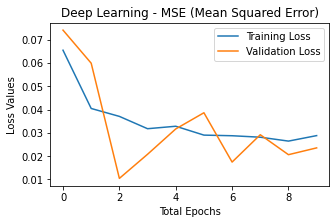

In [53]:
# drawing the plots of loss and val_loss through the history saved during fitting our model
plt.rcParams["figure.figsize"] = (5,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Deep Learning - MSE (Mean Squared Error)')
plt.ylabel('Loss Values')
plt.xlabel('Total Epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [61]:
print('First 5 Predicted Test Values')
print(np.array(model.predict(X_test)).flatten()[:5])

print('First 5 Actual Test Values')
print(np.array(y_test).flatten()[:5])


## Predicted quite nearer

First 5 Predicted Test Values
[0.5591178  0.32097495 0.705351   0.80211806 0.79585695]
First 5 Actual Test Values
[0.57361236 0.32422314 0.72289184 0.85558872 0.8371862 ]


Different Models I used and their MSE (Mean Squared Errors) comparisons:

| Models | MAE/MSE |
| --- | --- |
| Decision Tree Regressor | 0.0004938 |
| Linear Regression | 0.0000962 |
| Support Vector Regressor | 0.0650580 |
| Enselble Voting Regressor | 0.0217078 |
| Bagging - DTR | 0.0002752 |
| Deep Neural Network | 0.0235000 |

#### I got these estimations where value loss and improved error on the testing data was seen through deep neural network. 
* I will better carry on with the Linear Regression, Neural Network or Decision Tree Regressor. 
* Models are even performing well on the unseen data as well where we can predict price formation.
* Price with the use of these features ('market cap', 'circulating supply', 'volume', '% 1h', '% 24h', '% 1wk').
* Further research can be made over the live data which we can made to predict price and then trade accordingly. 

#### Results:
First 5 Predicted Test Values <br>
[0.5591178  0.32097495 0.705351   0.80211806 0.79585695] <br><br>
First 5 Actual Test Values <br>
[0.57361236 0.32422314 0.72289184 0.85558872 0.8371862 ] <br>

### References:
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
* https://www.tensorflow.org/tutorials/quickstart/beginner
